# Project: Wrangling and Analyze Data (WeRateDogs)

## Table of Contents
<ul>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessing">Assessing Data</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
<li><a href="#analyzing">Analyzing and Visualizing Data</a></li>
</ul>

In [1]:
#importing required libraries 
import pandas as pd
import numpy as np
import requests
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from io import BytesIO

%matplotlib inline

<a id='gathering'></a>
## Data Gathering
Gather **all** three pieces of data for this project and load them in the notebook.

**Steps**
* Read **twitter_archive_enhance.csv** file into a dataframe called twitter
* Programmatically download the **image_predictions.tsv** using the Request library
* As I did not get any feedback from Twitter after applying for the Twitter developer account, I directly downloaded the **tweet_json.tx** through the shortcut approach provided. After downloading, I read this .txt file line by line into a pandas DataFrame called tweet with (at minimum) tweet ID, retweet count, and favorite count.

In [2]:
# Directly downloading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
# Reading it into a dataframe called twitter 
twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Using the Requests library to download the tweet image prediction (image_predictions.tsv)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
# Accessing the content

with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

In [5]:
#read the file into a dataframe called image
image = pd.read_csv('image-predictions.tsv', sep= '\t')

In [6]:
# reading the Json.txt file line by line into Pandas DataFrame with tweet_id, retweet_count and favorite_count
df_list = []
with open('tweet-json.txt', 'r') as Json_file:
    for line in Json_file:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        create_date = tweet['created_at']
        df_list.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'create_date' : create_date,
                  'tweet_id' : tweet_id})
        
#saving the tweet-json.txt file into a dataframe called tweet
tweet = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'create_date'])


<a id='assessing'></a>
## Assessing Data

* I will be assessing the datasets one after the other visually and programmatically for quality and tidiness issues.


* Firstly, I will be assessing the **twitter-archive-enhanced.csv** which is in a dataframe called **twitter**. In addition, I also used Excel to perform a quick visual assessment of the twitter data. 

In [7]:
# Visually assessing twitter
twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
# Programatically accessing twitter
twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
# checking the data types and if there are some missing values in the data
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
# checking the number of rows and columns
twitter.shape

(2356, 17)

In [11]:
# checking for duplicates
sum(twitter.duplicated())

0

In [12]:
# checking for duplicates in the expanded_urls column
twitter[twitter.expanded_urls.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timison. He just told an awful joke bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pipsy. He is a fluffball. Enjoys trave...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None


In [13]:
# Checking for missing values in the dataset
twitter.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [14]:
# Checking the name column
twitter.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [15]:
#checking the rating_numerator column values
twitter['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [16]:
#checking the rating_denominator column values
twitter['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64


* Secondly, I will be assessing the **image-predictions.tsv** which is in a dataframe called **image**


In [17]:
# Visually assessing image
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [18]:
# Programatically accessing image
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
# checking the data types and if there are some missing values in the data
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
# checking the number of rows and columns
image.shape

(2075, 12)

In [21]:
# checking for duplicates
sum(image.duplicated())

0

In [22]:
#checking the image jpg_url column
image['jpg_url'].value_counts()

https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg                                            1
https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg                                            1
https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg                                            1
https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg                                            1
https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg                       

In [23]:
#checking to see the row data of a jpg_url that's duplicated
image[image['jpg_url'] == 'https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.50537,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.50537,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True


* There is a duplicate with all the columns having the same entry excpet the tweet_id column

In [24]:
# Checking for missing values in the dataset
image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

* Thirdly, I will be assessing the **tweet-json.txt** which is in a dataframe called **tweet**

In [25]:
# Visually accessing tweet
tweet

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017
...,...,...,...,...
2349,666049248165822465,41,111,Mon Nov 16 00:24:50 +0000 2015
2350,666044226329800704,147,311,Mon Nov 16 00:04:52 +0000 2015
2351,666033412701032449,47,128,Sun Nov 15 23:21:54 +0000 2015
2352,666029285002620928,48,132,Sun Nov 15 23:05:30 +0000 2015


In [26]:
# Programatically accessing twitter
tweet.head()

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017


In [27]:
# checking the data types and if there are some missing values in the data
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   create_date     2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [28]:
# checking the number of rows and columns
tweet.shape

(2354, 4)

In [29]:
# checking statistical info of the data
tweet.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [30]:
# checking for duplicates
sum(tweet.duplicated())

0

In [31]:
# Checking for missing values in the dataset
tweet.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
create_date       0
dtype: int64

### Quality issues

* **twitter**

1. According to one of the project's requirements, we only want original ratings (no retweets) that have images. The retweeted tweets can be seen in columns like 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp'.

2. Timestamp is an object instead of a datetime

3. In the name column, many entries contain invalid dog names such as none, a, quite, such, etc.

4. There are several duplicates in the expanded_url column.

5. For the dog styles (puppo, doggo, floofer, and pupper columns), missing values are represented as 'None' instead of 'NaN'.

6. There are inconsistencies in the name column with some dog names starting with capital letters while some starts with small letters.

7. Extract content from source column.

8. Cleaning rating_numerator and rating_denominator.

* **image**

9. There are duplicated entries with the same **jpg_url** but different tweet_id column.

10. There are inconsistencies in the columns like **p1, p2, p3** with some dog names starting with capital letters while some starts with small letters.

* **tweet**

11. create_date is an object instead of a datetime.

* General

12. tweet_id column in all the tables is stored as an int instead of a string.



### Tidiness issues

* **twitter**

1. Dog stages (doggo, floofer, pupper, and puppo) are in different columns and some dogs have more than one style:
    * tweet_id = 854010172552949000 (doggo and floofer)
    * tweet_id = 855851453814013000 (doggo and puppo) etc.

2. Merge the three datasets into one file.

<a id='cleaning'></a>
## Cleaning Data
In this section, I will be cleaning all the quality and tidiness issuess discovered during the data assessment stage.

In [32]:
# Make copies of original pieces of data

twitter_clean = twitter.copy()
image_clean = image.copy()
tweet_clean = tweet.copy()

## Quality Issues

### Issue #1: According to one of the project's requirements, we only want original ratings (no retweets) that have images.

#### Define: The retweets can be found in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns. in_reply_to_status_id and in_reply_to_status_id columns contain replies. Entries where these columns are not null will be removed. This way, all retweets and replies will be removed from the twitter dataset. Also, these columns will be dropped.

#### Code

In [33]:
# firstly viewing the data before the change
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [34]:
# finding rows to remove where the retweet columns is not null
retweet_1 = sum(twitter_clean.in_reply_to_status_id.notnull())
retweet_2 = sum(twitter_clean.in_reply_to_user_id.notnull())
retweet_3 = sum(twitter_clean.retweeted_status_id.notnull())
retweet_4 = sum(twitter_clean.retweeted_status_user_id.notnull())
retweet_5 = sum(twitter_clean.retweeted_status_timestamp.notnull())


print(retweet_1)
print(retweet_2)
print(retweet_3)
print(retweet_4)
print(retweet_5)

78
78
181
181
181


In [35]:
# drop the entries that are not null
# only keep entries that are null
twitter_clean = twitter_clean[twitter_clean.in_reply_to_status_id.isnull()]
twitter_clean = twitter_clean[twitter_clean.in_reply_to_user_id.isnull()]
twitter_clean = twitter_clean[twitter_clean.retweeted_status_id.isnull()]
twitter_clean = twitter_clean[twitter_clean.retweeted_status_user_id.isnull()]
twitter_clean = twitter_clean[twitter_clean.retweeted_status_timestamp.isnull()]

In [36]:
# Remove not needed columns
twitter_clean.drop(['in_reply_to_status_id', 
                    'in_reply_to_user_id', 
                    'retweeted_status_id', 
                    'retweeted_status_user_id', 
                    'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [37]:
# viewing the data after the change
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue #2: Timestamp is an object instead of a datetime

#### Define: Change the column type of timestamp from object to datetime using to_datetime

#### Code

In [38]:
twitter_clean['timestamp']= pd.to_datetime(twitter_clean['timestamp'])

#### Test

In [39]:
twitter_clean.dtypes['timestamp']

datetime64[ns, UTC]

### Issue #3: In the name column, many entries contain invalid dog names such as none, a, quite, such, etc. 

#### Define: . Change names with words like 'a', 'an', 'such', 'None' to NAN values

#### Code

In [40]:
#replacing dog names like 'such', 'a' and 'an' with NAN
twitter_clean['name'].replace('such', np.NAN, inplace =True)
twitter_clean['name'].replace('a', np.NAN, inplace =True)
twitter_clean['name'].replace('an', np.NAN, inplace =True)
twitter_clean['name'].replace('the', np.NAN, inplace =True)
twitter_clean['name'].replace('None', np.NAN, inplace =True)


#### Test

In [41]:
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [42]:
twitter_clean['name'].value_counts()

Charlie       11
Lucy          11
Oliver        10
Cooper        10
Tucker         9
              ..
Wishes         1
Rose           1
Theo           1
Fido           1
Christoper     1
Name: name, Length: 950, dtype: int64

In [43]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1424 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue #4: There are several duplicates in the expanded_url column

#### Define: Remove duplicates using drop_duplicates

#### Code

In [44]:
twitter_clean.drop_duplicates(subset= 'expanded_urls', inplace = True)

#### Test

In [45]:
sum(twitter_clean.expanded_urls.duplicated())

0

### Issue #5: For the dog styles (puppo, doggo, floofer, and pupper columns), issing values are represented as 'None' instead of 'NaN'

#### Define: Change 'none' to 'NaN' in the columns

#### Code

In [46]:
# Change None to NaN
def change_to_null(item):
    if item == 'None':
        item = np.NaN
    return item

twitter_clean['doggo'] = [change_to_null(item) for item in twitter_clean['doggo']]
twitter_clean['floofer'] = [change_to_null(item) for item in twitter_clean['floofer']]
twitter_clean['pupper'] = [change_to_null(item) for item in twitter_clean['pupper']]
twitter_clean['puppo'] = [change_to_null(item) for item in twitter_clean['puppo']]

#### Test

In [47]:
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


### Issue #6: There are inconsistencies in the name column with some dog names starting with capital letters while some starts with small letters.

#### Define: Capitalize the first letter of the dog names in the name column

#### Code

In [48]:
#convert the name column to a string first

twitter_clean['name'] = twitter_clean['name'].astype(str)

In [49]:
#confirming the change
twitter_clean['name'].dtypes

dtype('O')

In [50]:
# Capitalize first letters
twitter_clean['name'] = [name.capitalize() for name in twitter_clean['name']]

#### Test

In [51]:
# Check first letter capitalization
twitter_clean['name'].sample(20)

1975     Kenzie
1363       Chip
325     Bentley
754         Nan
2101      Ester
1897      Rufio
616         Nan
2041         Jd
1617    Gerbald
1152     Lillie
1408        Nan
1581     Samson
2107        Nan
92          Jed
1921        Gus
2068        Nan
2191        Nan
1958        Nan
972      Spanky
563      Winnie
Name: name, dtype: object

### Issue #7: Extract content from source column.

#### Define: To ease readability, I will extract the main text from the source column.

#### Code

In [52]:
#view source column
twitter_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1962
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          90
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [53]:
#extract text 
twitter_clean['source'] = twitter_clean['source'].str.extract(r"\>(.*?)\<")

#### Test

In [54]:
#view dataset
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


### Issue #8: Cleaning rating_numerator and rating_denominator.

#### Define: Seperate rating_numerator and rating denominator by a "/" to create a new column called rating

#### Code

In [55]:
#create rating column
twitter_clean['rating'] = twitter_clean['rating_numerator'].astype(str) + '/'+ twitter_clean['rating_denominator'].astype(str) 

#### Test

In [56]:
twitter_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,13/10
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,13/10


### Issue #9: There are duplicated entries with the same jpg_url but different tweet_id column.

#### Define: Delete duplicates using the drop_duplicates for the jpg_url  column.

#### Code

In [57]:
# checking the number of duplicates
sum(image_clean.jpg_url.duplicated())

66

In [58]:
image_clean.drop_duplicates(subset= 'jpg_url', inplace = True)

#### Test

In [59]:
# confirming the change
sum(image_clean.jpg_url.duplicated())

0

### Issue #10: There are inconsistencies in the columns like **p1, p2, p3** with some dog names starting with capital letters while some starts with small letters.

#### Define: Capitalize the first letters in the columns

#### Code

In [60]:
# Capitalize first letters
image_clean['p1'] = [item.capitalize() for item in image_clean['p1']]
image_clean['p2'] = [item.capitalize() for item in image_clean['p2']]
image_clean['p3'] = [item.capitalize() for item in image_clean['p3']]

#### Test

In [61]:
# Check first letter capitalization
image_clean['p3'].sample(20)

748     American_staffordshire_terrier
1653                  Miniature_poodle
536                     Great_pyrenees
2040                        Eskimo_dog
1981                              Swab
507     American_staffordshire_terrier
1078                               Cab
1567                             Brass
1883                  Lakeland_terrier
1328                   Tibetan_mastiff
1930                        Bloodhound
1214                        Eskimo_dog
150                      Toilet_tissue
1082                             Chime
735        German_short-haired_pointer
816                         White_wolf
266                               Chow
257                              Boxer
1807                       Siamese_cat
445                 Labrador_retriever
Name: p3, dtype: object

### Issue #11: create_date is an object instead of a datetime.

#### Define: Change the column type of create_date from object to datetime using to_datetime

#### Code

In [62]:
tweet_clean['create_date']= pd.to_datetime(tweet_clean['create_date'])

#### Test

In [63]:
tweet_clean['create_date'].dtypes

datetime64[ns, UTC]

### Issue #12: tweet_id column in all the tables is stored as an int instead of a string.

#### Define: convert the tweet_id columns in the three datasets to string using the 'astype()' function

#### Code

In [64]:
twitter_clean['tweet_id'] = twitter_clean['tweet_id'].astype(str)
image_clean['tweet_id'] = image_clean['tweet_id'].astype(str)
tweet_clean['tweet_id'] = tweet_clean['tweet_id'].astype(str)

#### Test

In [65]:
twitter_clean['tweet_id'].dtypes

dtype('O')

In [66]:
image_clean['tweet_id'].dtypes

dtype('O')

In [67]:
tweet_clean['tweet_id'].dtypes

dtype('O')

### Tidiness issues

### Issue #1: Dog stages (doggo, floofer, pupper, and puppo) are in different columns and some dogs have more than one style:

* tweet_id = 854010172552949000 (doggo and floofer)
* tweet_id = 855851453814013000 (doggo and puppo) etc.

#### Define: Consolidate dog type columns doggo, floofer, pupper, puppo into one named dog_style.
* In the few cases where a dog has more than one style assigned, only one will be taken. If not doggo, then floofer, then pupper, then puppo, or NaN.

#### Code

In [68]:
# Consolidate data
twitter_clean['dog_style'] = twitter_clean.doggo.fillna(twitter_clean.floofer.fillna(twitter_clean.pupper.fillna(twitter_clean.puppo)))

In [69]:
# Test values assignment
twitter_clean[['dog_style', 'doggo', 'floofer', 'pupper', 'puppo']]

,dog_style,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2351,NaN,NaN,NaN,NaN,NaN
2352,NaN,NaN,NaN,NaN,NaN
2353,NaN,NaN,NaN,NaN,NaN
2354,NaN,NaN,NaN,NaN,NaN


In [70]:
twitter_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,dog_style
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,13/10,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,13/10,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,12/10,NaN


In [71]:
# Remove not needed columns
twitter_clean.drop(['doggo', 
                    'floofer', 
                    'pupper', 
                    'puppo'], axis=1, inplace=True)

In [72]:
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_style
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,13/10,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,13/10,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,12/10,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,13/10,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,12/10,NaN


### Issue #2: Merge the three datasets into one file.


#### Define: All the three datasets have a similar column called 'tweet_id'. This column will be used to merge all three datasets into one file.

#### Code

### Viewing the three cleaned datasets

In [73]:
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_style
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,13/10,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,13/10,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,12/10,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,13/10,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,12/10,NaN


In [74]:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [75]:
tweet.head()

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017


In [76]:
merged_dataset = twitter_clean.merge(image_clean, on='tweet_id').merge(tweet_clean, on='tweet_id')

In [77]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   rating              1971 non-null   object             
 9   dog_style           303 non-null    object             
 10  jpg_url             1971 non-null   object             
 11  img_num             1971 non-null   int64              
 12  p1                  1971 non-null 

In [78]:
# drop columns that are not needed
# removing create_date column since there's a date columns (timestamp) already
merged_dataset.drop(['rating_numerator', 'rating_denominator', 'jpg_url', 'expanded_urls', 'create_date', 'img_num'], axis =1, inplace= True)

In [79]:
merged_dataset.head(3)

,tweet_id,timestamp,source,text,name,rating,dog_style,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,13/10,NaN,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,13/10,NaN,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,12/10,NaN,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328,25461


In [80]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1971 non-null   object             
 1   timestamp       1971 non-null   datetime64[ns, UTC]
 2   source          1971 non-null   object             
 3   text            1971 non-null   object             
 4   name            1971 non-null   object             
 5   rating          1971 non-null   object             
 6   dog_style       303 non-null    object             
 7   p1              1971 non-null   object             
 8   p1_conf         1971 non-null   float64            
 9   p1_dog          1971 non-null   bool               
 10  p2              1971 non-null   object             
 11  p2_conf         1971 non-null   float64            
 12  p2_dog          1971 non-null   bool               
 13  p3              1971 non-null   o

In [81]:
# checking for duplicates
sum(merged_dataset.duplicated())

0

In [82]:
# checking for duplicates using tweet_id
sum(merged_dataset.tweet_id.duplicated())

0

### Storing the gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [83]:
merged_dataset.to_csv("twitter_archive_master.csv", index= False)

<a id='analyzing'></a>
## Analyzing and Visualizing Data
In this section, using the cleaned and merged dataset, I will now proceed to analyze and visualize the data.


### Insights:
1. What are the 3 most common dog names?

2. What is the most common dog style?

3. What has been the distribution of tweets over the years?

4. What is the most popular source of tweets?

5. What is the correlation between retweet_count and favorite_count?

6. What dog_style have the highest average retweet_count?

7. What dog_style have the highest average favorite_count?

In [84]:
#checking the number of columns and rows in the merged dataset
merged_dataset.shape

(1971, 18)

In [85]:
#checking the size of the merged datset
merged_dataset.size

35478

In [86]:
#checking for null values and the datatypes
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1971 non-null   object             
 1   timestamp       1971 non-null   datetime64[ns, UTC]
 2   source          1971 non-null   object             
 3   text            1971 non-null   object             
 4   name            1971 non-null   object             
 5   rating          1971 non-null   object             
 6   dog_style       303 non-null    object             
 7   p1              1971 non-null   object             
 8   p1_conf         1971 non-null   float64            
 9   p1_dog          1971 non-null   bool               
 10  p2              1971 non-null   object             
 11  p2_conf         1971 non-null   float64            
 12  p2_dog          1971 non-null   bool               
 13  p3              1971 non-null   o

In [87]:
# checking data statistical info
merged_dataset.describe()

,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1971.000000,1.971000e+03,1.971000e+03,1971.000000,1971.000000
mean,0.594558,1.345850e-01,6.016556e-02,2784.449518,8949.106545
std,0.272126,1.010527e-01,5.094156e-02,4697.662893,12267.799790
min,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,0.363091,5.339800e-02,1.608055e-02,628.500000,1997.000000
50%,0.587764,1.173970e-01,4.944380e-02,1367.000000,4147.000000
75%,0.847827,1.955655e-01,9.153815e-02,3239.000000,11402.500000
max,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


In [88]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1971 non-null   object             
 1   timestamp       1971 non-null   datetime64[ns, UTC]
 2   source          1971 non-null   object             
 3   text            1971 non-null   object             
 4   name            1971 non-null   object             
 5   rating          1971 non-null   object             
 6   dog_style       303 non-null    object             
 7   p1              1971 non-null   object             
 8   p1_conf         1971 non-null   float64            
 9   p1_dog          1971 non-null   bool               
 10  p2              1971 non-null   object             
 11  p2_conf         1971 non-null   float64            
 12  p2_dog          1971 non-null   bool               
 13  p3              1971 non-null   o

In [89]:
merged_dataset.head()

,tweet_id,timestamp,source,text,name,rating,dog_style,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,13/10,NaN,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,13/10,NaN,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,12/10,NaN,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,13/10,NaN,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,12/10,NaN,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


#### 1. What are the 3 most common dog names?

In [90]:
common_names = merged_dataset.name.value_counts().nlargest(6)[1:6]
common_names

Charlie    11
Oliver     10
Lucy       10
Cooper     10
Penny       9
Name: name, dtype: int64

The most popular dog name is **Lucy and Charlie** with 10 dogs bearing the names, followed by **Tucker(9)**.

#### 2.  What is the most common dog style?

In [91]:
dog_style = merged_dataset['dog_style'].value_counts()
dog_style

pupper     201
doggo       73
puppo       22
floofer      7
Name: dog_style, dtype: int64

The most common dog style is the **pupper** dog style.

#### 3. What has been the distribution of tweets over the years?

In [92]:
# Extracting the year from the timestamp column
merged_dataset['year'] = merged_dataset['timestamp'].dt.year

In [93]:
merged_dataset.head(3)

,tweet_id,timestamp,source,text,name,rating,dog_style,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,year
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,13/10,NaN,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8853,39467,2017
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,13/10,NaN,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514,33819,2017
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,12/10,NaN,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328,25461,2017


In [94]:
merged_dataset.year.dtypes

dtype('int64')

In [95]:
tweets_overtime = merged_dataset.groupby('year').count()['tweet_id']
tweets_overtime

year
2015    655
2016    962
2017    354
Name: tweet_id, dtype: int64

In 2015, the number of tweets was **653**. This grew significantly to **939** tweets in 2016, But fell to **338** in 2017. 

#### 4. What is the most popular source of tweets?

In [96]:
tweet_source = merged_dataset['source'].value_counts()
tweet_source

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

The most popular source of tweet is the **Twitter for iphone**

#### 5. What is the correlation between retweet_count and favorite_count?

In [97]:
# Checking the corr between retweet_count, favourite_count, rating
def revenue_corr(merged_datset, col):
    return merged_dataset[col].corr()

corr = ['retweet_count', 'favorite_count', 'rating']

revenue_corr(merged_dataset, corr)

,retweet_count,favorite_count
retweet_count,1.000000,0.913014
favorite_count,0.913014,1.000000


#### 6. What dog_style have the highest average retweet_count?

In [98]:
dog_style_avg_retweet = merged_dataset.groupby('dog_style')['retweet_count'].mean().sort_values(ascending=False)[0:4]
dog_style_avg_retweet.round(2)

dog_style
doggo      6941.45
puppo      6473.95
floofer    4968.71
pupper     2382.50
Name: retweet_count, dtype: float64

The **puppo** dog style have the highest average retweet_count of **6896.79**.

#### 7. What dog_style have the highest average favorite_count?

In [99]:
dog_style_avg_favorite = merged_dataset.groupby('dog_style')['favorite_count'].mean().sort_values(ascending=False)[0:4]
dog_style_avg_favorite.round(2)

dog_style
puppo      21582.09
doggo      19044.16
floofer    13206.00
pupper      7250.53
Name: favorite_count, dtype: float64

The **puppo** dog style have the highest average retweet_count of **23035.11**

### Visualization

In [100]:
#defining a function to set the visualization labels
def plot_labels(t, x, y):
     plt.title(t)
     plt.xlabel(x, fontsize = 10, fontweight = "bold")
     plt.ylabel(y, fontsize = 10, fontweight = "bold")
     plt.show()

#### 1.The 5 most common dog names

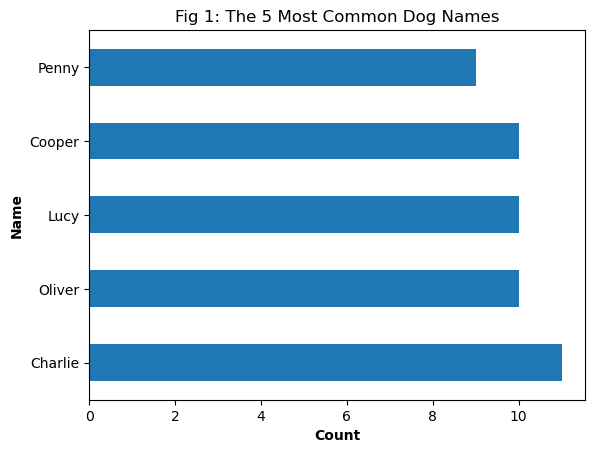

In [101]:
common_names.plot(kind = 'barh')

plot_labels("Fig 1: The 5 Most Common Dog Names", 'Count', 'Name')


#### 2.  Dog Style

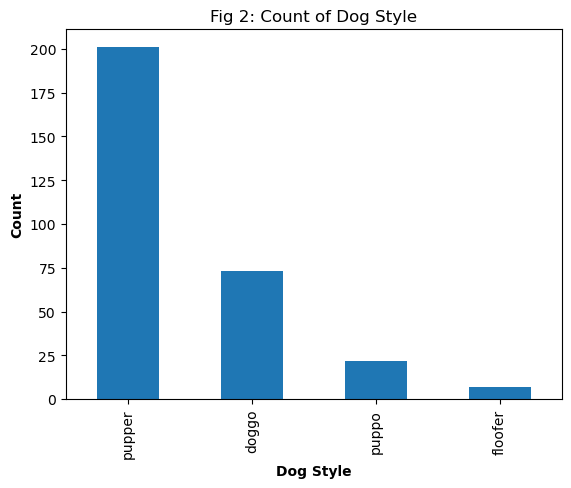

In [102]:
dog_style.plot(kind = 'bar')

plot_labels("Fig 2: Count of Dog Style", 'Dog Style', 'Count')

#### 3. Distribution of tweets over the years

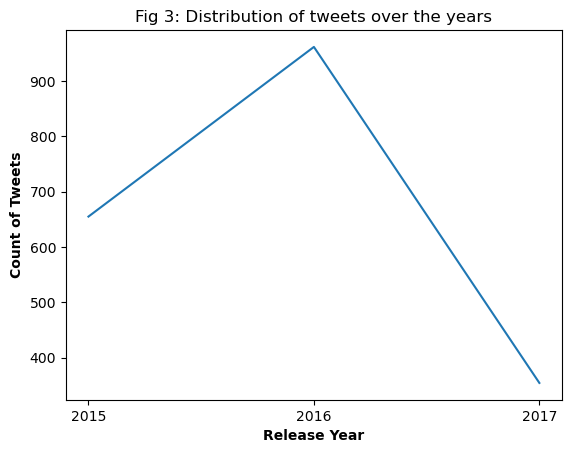

In [103]:
tweets_overtime.plot(xticks = np.arange(2015,2018,1))

plot_labels("Fig 3: Distribution of tweets over the years", 'Release Year', 'Count of Tweets')

#### 4. Dog style by retweet count

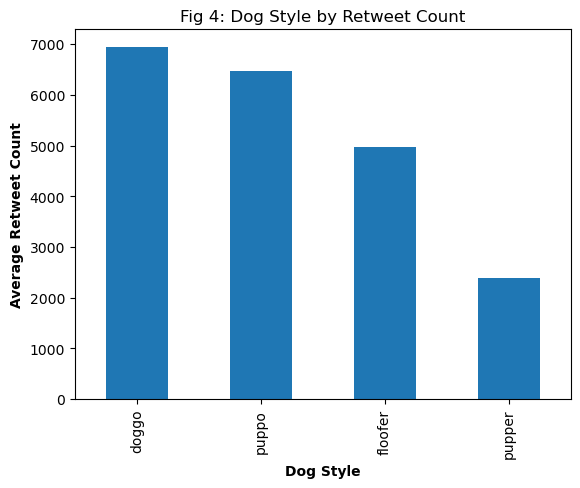

In [104]:
dog_style_avg_retweet.plot(kind = 'bar')

plot_labels("Fig 4: Dog Style by Retweet Count", 'Dog Style', 'Average Retweet Count')

#### 5. Dog style by favorite count

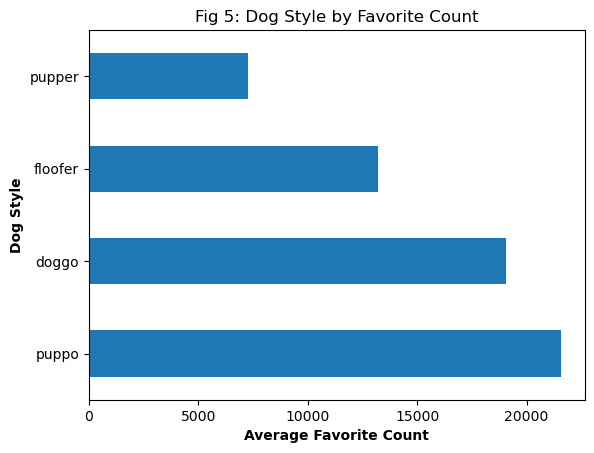

In [105]:
dog_style_avg_favorite.plot(kind = 'barh')

plot_labels("Fig 5: Dog Style by Favorite Count", 'Average Favorite Count', 'Dog Style')

#### 6. Correlation between retweet_count and favorite_count

                retweet_count  favorite_count
retweet_count        1.000000        0.913014
favorite_count       0.913014        1.000000


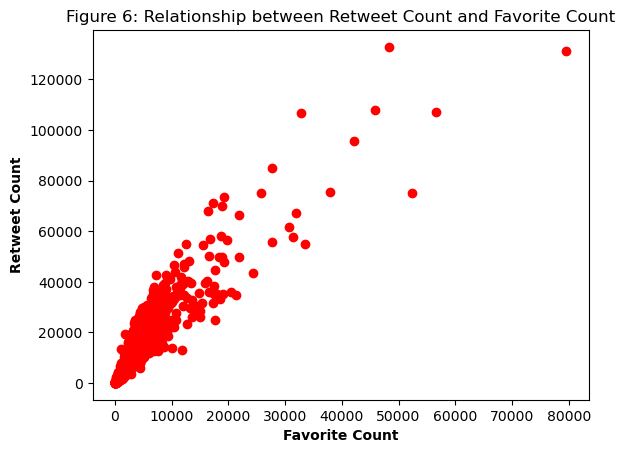

In [106]:
print (merged_dataset[['retweet_count','favorite_count']].corr())

plt.scatter(merged_dataset['retweet_count'], merged_dataset['favorite_count'], color='red')

plot_labels("Figure 6: Relationship between Retweet Count and Favorite Count", "Favorite Count", "Retweet Count")

plt.show()

There is a strong positive correlation between retweet_count and favorite_count